In [16]:
import psycopg2
from dotenv import load_dotenv
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import psycopg2
from dotenv import load_dotenv
import os
from  src.database import connect




In [22]:
conn = connect()
query = """
SELECT cg.date,
        cg.date,
        cg.white_player,
        cg.black_player,
        cg.result,
        cg.black_elo,
        cg.white_elo,
        cg.time_control,
        cg.termination,
        cg.moves
FROM chess_games cg
"""
df = pd.read_sql_query(query, conn)
conn.close()

df.head()

/tmp/ipykernel_24996/2867011540.py:15: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query, conn)


,date,date,white_player,black_player,result,black_elo,white_elo,time_control,termination,moves
0,2024-02-13,2024-02-13,gabrielpizzo,BryMan222,1-0,1028,1068,300,gabrielpizzo a gagné au temps,e2e4 b7b6 g1f3 c8b7 b1c3 e7e6 d2d4 f8b4 f1d3 g...
1,2024-02-13,2024-02-13,jsum3,gabrielpizzo,0-1,1075,1009,300,gabrielpizzo a gagné au temps,e2e4 e7e5 g1f3 b8c6 f1c4 f8c5 c2c3 g8f6 d2d3 e...
2,2024-02-13,2024-02-13,gabrielpizzo,ahepburn94,0-1,1098,1067,300,ahepburn94 a gagné par échec et mat,e2e4 g7g6 g1f3 f8g7 d2d4 d7d6 c1e3 g8f6 b1c3 e...
3,2024-02-13,2024-02-13,krascko,gabrielpizzo,0-1,1074,1024,300,gabrielpizzo a gagné au temps,e2e4 e7e5 g1f3 b8c6 f1c4 f8c5 c2c3 g8f6 d2d3 e...
4,2024-02-13,2024-02-13,gabrielpizzo,GrosJoLav,0-1,1035,1065,300,GrosJoLav a gagné par échec et mat,e2e4 d7d5 e4d5 d8d5 b1c3 d5a5 d2d4 g8f6 g1f3 b...


In [24]:
df[["moves"]]

,moves
0,e2e4 b7b6 g1f3 c8b7 b1c3 e7e6 d2d4 f8b4 f1d3 g...
1,e2e4 e7e5 g1f3 b8c6 f1c4 f8c5 c2c3 g8f6 d2d3 e...
2,e2e4 g7g6 g1f3 f8g7 d2d4 d7d6 c1e3 g8f6 b1c3 e...
3,e2e4 e7e5 g1f3 b8c6 f1c4 f8c5 c2c3 g8f6 d2d3 e...
4,e2e4 d7d5 e4d5 d8d5 b1c3 d5a5 d2d4 g8f6 g1f3 b...
5,e2e3 e7e5 g1e2 d7d5
6,e2e4 e7e5 g1f3 b8c6 d2d4 d7d6 d4e5 c6e5 f3e5 d...
7,e2e4 c7c6 d2d4 d8c7 b1c3 d7d6 g1f3 b8d7 c1e3 f...
8,d2d4 d7d5 c1f4 e7e6 e2e3 g8f6 c2c4 c7c5 c4d5 e...
9,e2e4 e7e5 g1f3 b8c6 f1c4 f8c5 c2c3 g8f6 b2b4 c...


    result  count
0      0-1     22
1      1-0     27
2  1/2-1/2      1


/tmp/ipykernel_24996/1195083816.py:7: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query, conn)
/tmp/ipykernel_24996/1195083816.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='result', y='count', data=df, palette='viridis')


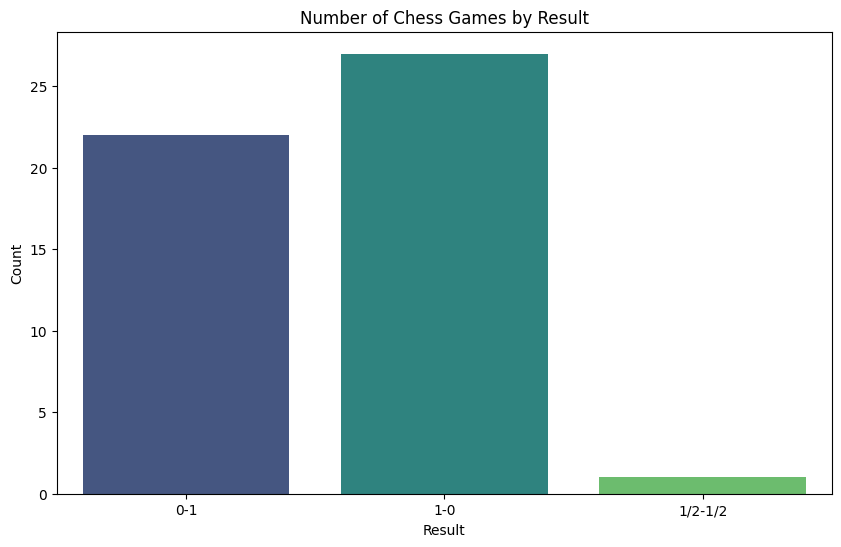

In [17]:
conn = connect()
query = """
SELECT result, COUNT(*) as count
FROM chess_games
GROUP BY result;
"""
df = pd.read_sql_query(query, conn)
conn.close()



# Display the DataFrame
print(df)

# Set up the visualization
plt.figure(figsize=(10, 6))
sns.barplot(x='result', y='count', data=df, palette='viridis')
plt.title('Number of Chess Games by Result')
plt.xlabel('Result')
plt.ylabel('Count')
plt.show()